# Projeto 2 - Students Performance in Exams



In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [114]:
# Lendo a Base de Dados
Base_Dados = pd.read_csv('StudentsPerformance.csv')

# dimensão
Base_Dados.shape

(1000, 8)

In [115]:
# Head
Base_Dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


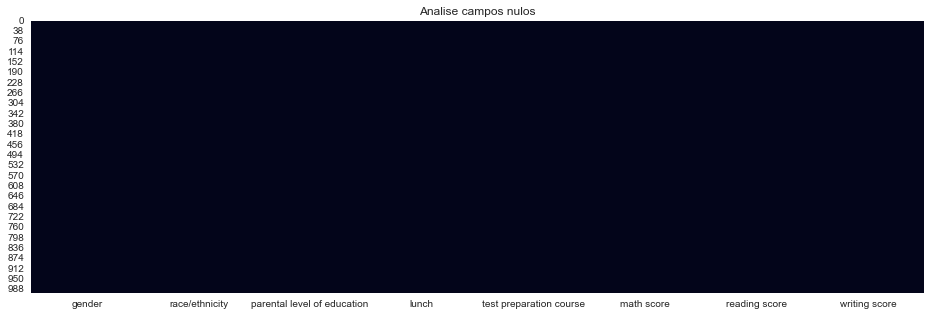

In [116]:
# Campos nulos
Nulos = Base_Dados.isnull()

plt.figure( figsize=(16,5 ) )
plt.title('Analise campos nulos')
sns.heatmap( Nulos, cbar=False );

In [117]:
# Unicos
Base_Dados.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [118]:
# Campos duplicados
Base_Dados.duplicated().sum()

0

In [119]:
# Estatistca
Base_Dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [120]:
# Info
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [121]:
#renomeando colunas
Base_Dados.rename(columns= {
    "gender": "Sexo",
    "race/ethnicity": "raça/etnia",
    "parental level of education": "Nível de escolaridade dos pais",
    "lunch": "Almoço",
    "test preparation course": "Curso de preparação",
    "math score": "Pontuação Matemática",
    "reading score": "Pontuação de leitura",
    "writing score": "Pontuação de escrita"}, inplace = True)
Base_Dados.head()

,Sexo,raça/etnia,Nível de escolaridade dos pais,Almoço,Curso de preparação,Pontuação Matemática,Pontuação de leitura,Pontuação de escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


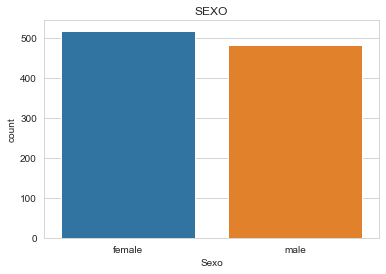

In [122]:
#Comparando Sexos
sns.set_style('whitegrid')
sns.countplot(Base_Dados['Sexo'])
plt.title('SEXO')
plt.show()

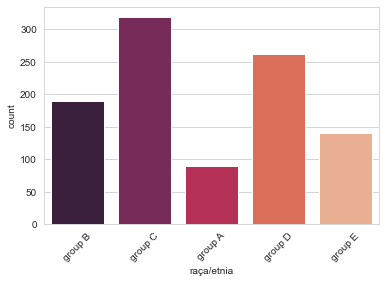

In [137]:
sns.countplot(Base_Dados['raça/etnia'], palette ="rocket")
plt.xticks(rotation=45)
plt.show()

In [139]:
#visualizando o Nível de escolaridade dos pais
Base_Dados['Nível de escolaridade dos pais'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Nível de escolaridade dos pais, dtype: int64

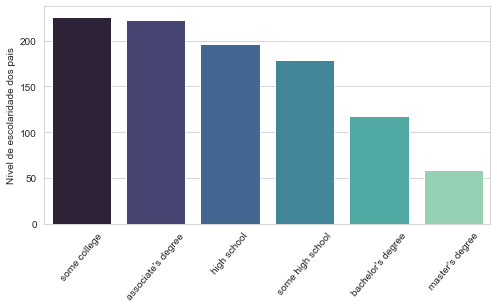

In [140]:
#apresentando o Nível de escolaridade dos pais
plt.figure(figsize=(8,4))
sns.barplot( Base_Dados['Nível de escolaridade dos pais'].value_counts().index, Base_Dados['Nível de escolaridade dos pais'].value_counts(), palette ="mako")
plt.xticks(rotation=50)
plt.show()

In [142]:
Base_Dados['Almoço'].value_counts()

standard        645
free/reduced    355
Name: Almoço, dtype: int64

In [144]:
#Quantos fizeram o curso de preparação
Base_Dados['Curso de preparação'].value_counts()

none         642
completed    358
Name: Curso de preparação, dtype: int64

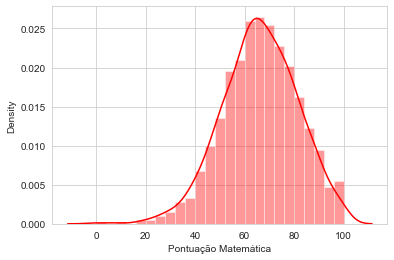

In [148]:
sns.distplot(Base_Dados['Pontuação Matemática'],color='red')
plt.show()

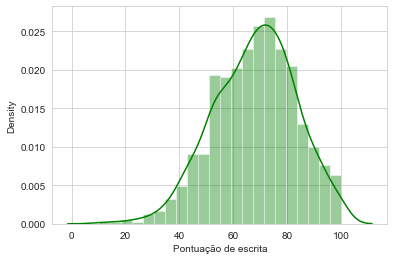

In [151]:
sns.distplot(Base_Dados["Pontuação de escrita"],color="green")
plt.show()

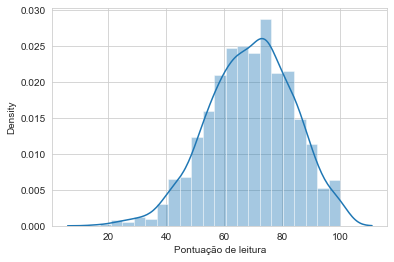

In [154]:
sns.distplot(Base_Dados["Pontuação de leitura"])
plt.show()

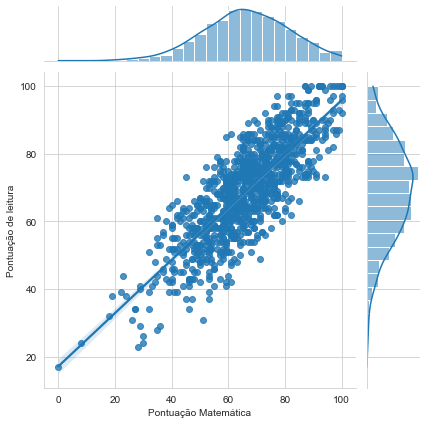

In [157]:
sns.jointplot(x='Pontuação Matemática',y="Pontuação de leitura",data=Base_Dados,kind='reg')
plt.show()

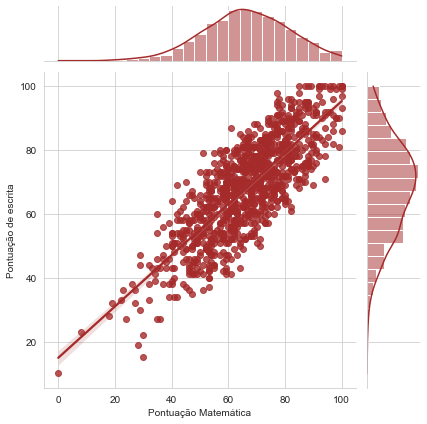

In [161]:
sns.jointplot(x='Pontuação Matemática',y="Pontuação de escrita",color='brown',data=Base_Dados,kind='reg')
plt.show()

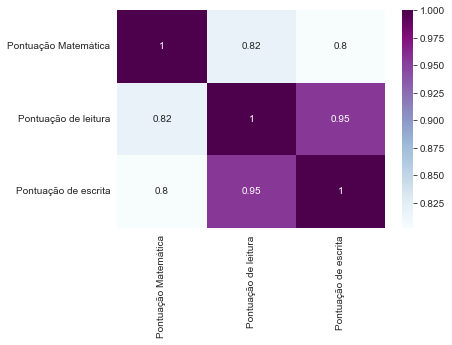

In [164]:
sns.heatmap(Base_Dados.corr(),annot=True,cmap='BuPu')
plt.show()

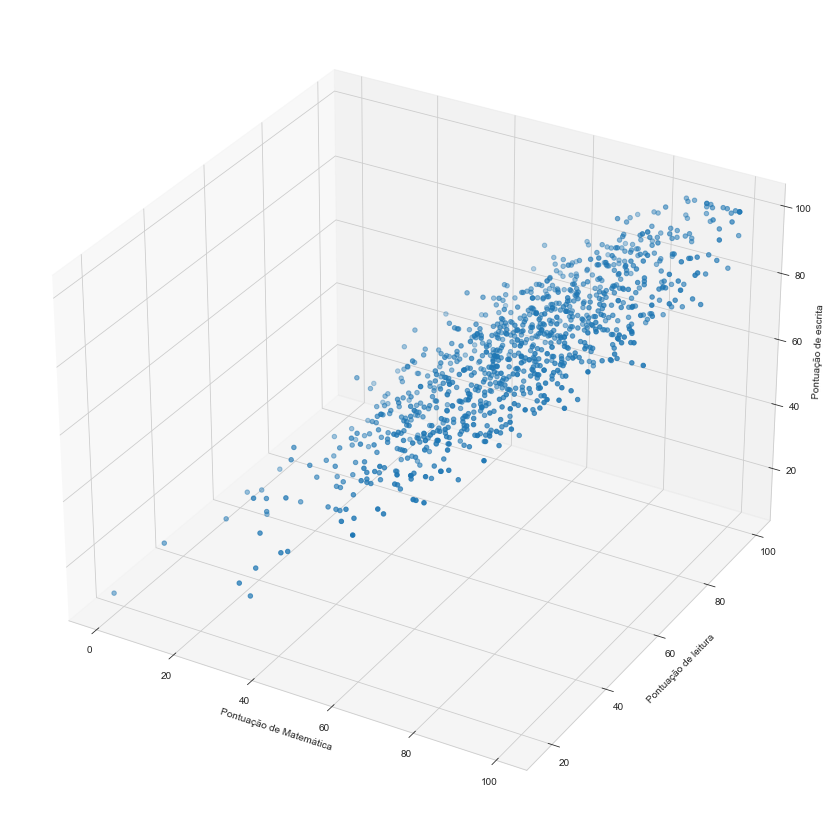

In [172]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')

x = Base_Dados['Pontuação Matemática']
y = Base_Dados["Pontuação de leitura"]
z = Base_Dados["Pontuação de escrita"]

ax.set_xlabel("Pontuação de Matemática")
ax.set_ylabel("Pontuação de leitura")
ax.set_zlabel("Pontuação de escrita")

ax.scatter(x, y, z)

plt.show()